<a href="https://colab.research.google.com/github/funnyPhani/college-assignment/blob/main/Image_Classification_Using_Transfer_Learning_for_beans_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf 
import tensorflow_datasets as tfds
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!nvidia-smi

Mon Sep 28 09:15:27 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
datasets,info=tfds.load('beans',with_info=True,as_supervised=True,split=['train','test','validation'])

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incomplete0LHTAA/beans-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incomplete0LHTAA/beans-validation.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incomplete0LHTAA/beans-test.tfrecord


Dataset beans downloaded and prepared to /root/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.


In [ ]:
info

tfds.core.DatasetInfo(
    name='beans',
    version=0.1.0,
    description='Beans is a dataset of images of beans taken in the field using smartphone
cameras. It consists of 3 classes: 2 disease classes and the healthy class.
Diseases depicted include Angular Leaf Spot and Bean Rust. Data was annotated
by experts from the National Crops Resources Research Institute (NaCRRI) in
Uganda and collected by the Makerere AI research lab.
',
    homepage='https://github.com/AI-Lab-Makerere/ibean/',
    features=FeaturesDict({
        'image': Image(shape=(500, 500, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=1295,
    splits={
        'test': 128,
        'train': 1034,
        'validation': 133,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {beansdata,
        author="Makerere AI Lab",
        title="Bean disease dataset",
        month="January",
        year="2020",
        url="https://gi

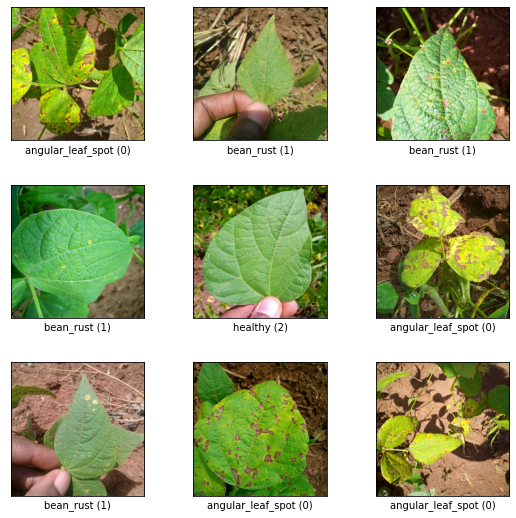

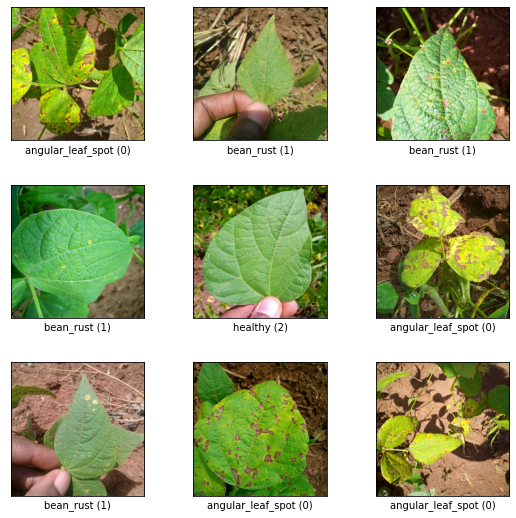

In [ ]:
train,info_train=tfds.load('beans',with_info=True,split='test')
tfds.show_examples(info_train,train)

In [ ]:
def scale(image,label):
  image=tf.cast(image,tf.float32)
  image /=225.0

  return tf.image.resize(image,[224,224]),tf.one_hot(label,3)

In [ ]:
def get_dataset(batch_size=32):
  train_dataset_scaled=datasets[0].map(scale).shuffle(1000).batch(batch_size)
  test_dataset_scaled=datasets[1].map(scale).batch(batch_size)
  val_dataset_scaled=datasets[2].map(scale).batch(batch_size)

  return train_dataset_scaled, test_dataset_scaled, val_dataset_scaled

In [ ]:
train_dataset, test_dataset, val_dataset= get_dataset()
train_dataset.cache()
val_dataset.cache()

<DatasetV1Adapter shapes: ((None, 224, 224, 3), (None, 3)), types: (tf.float32, tf.float32)>

In [ ]:
len(list(datasets[0]))

1034

In [ ]:
feature_extractor='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

In [ ]:
feature_extractor_layer=hub.KerasLayer(feature_extractor,input_shape=(224,224,3))

In [ ]:
feature_extractor_layer.trainable=False

In [ ]:
model=tf.keras.models.Sequential(
    [
     feature_extractor_layer,
     tf.keras.layers.Dropout(0.30),
     tf.keras.layers.Dense(3,activation='softmax')
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 3843      
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history=model.fit(train_dataset,epochs=3,validation_data=val_dataset,steps_per_epoch=10)

Epoch 1/3
10/10 [==============================] - 14s 1s/step - loss: 0.7339 - accuracy: 0.8344 - val_loss: 0.7296 - val_accuracy: 0.8271
Epoch 2/3
10/10 [==============================] - 14s 1s/step - loss: 0.7176 - accuracy: 0.8500 - val_loss: 0.7156 - val_accuracy: 0.8496
Epoch 3/3
10/10 [==============================] - 14s 1s/step - loss: 0.7084 - accuracy: 0.8687 - val_loss: 0.7105 - val_accuracy: 0.8421


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history=model.fit(train_dataset,epochs=10,validation_data=val_dataset)

Epoch 1/10
33/33 [==============================] - 4s 133ms/step - loss: 0.9448 - accuracy: 0.6074 - val_loss: 0.8139 - val_accuracy: 0.7744
Epoch 2/10
33/33 [==============================] - 3s 90ms/step - loss: 0.7951 - accuracy: 0.7785 - val_loss: 0.7543 - val_accuracy: 0.8421
Epoch 3/10
33/33 [==============================] - 3s 90ms/step - loss: 0.7491 - accuracy: 0.8182 - val_loss: 0.7317 - val_accuracy: 0.8346
Epoch 4/10
33/33 [==============================] - 3s 90ms/step - loss: 0.7287 - accuracy: 0.8375 - val_loss: 0.7160 - val_accuracy: 0.8571
Epoch 5/10
33/33 [==============================] - 3s 92ms/step - loss: 0.7023 - accuracy: 0.8733 - val_loss: 0.7034 - val_accuracy: 0.8647
Epoch 6/10
33/33 [==============================] - 3s 91ms/step - loss: 0.6936 - accuracy: 0.8810 - val_loss: 0.6963 - val_accuracy: 0.8722
Epoch 7/10
33/33 [==============================] - 3s 90ms/step - loss: 0.6864 - accuracy: 0.8810 - val_loss: 0.6877 - val_accuracy: 0.8797
Epoch 8/10
3

In [ ]:
model.save('beans')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
2020-08-20 17:09:54.335 WARNING tensorflow: From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
2020-08-20 17:09:54.355 WARNING tensorflow: From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/tracking/tracking.py:111: Layer.updates (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: beans/assets


INFO:tensorflow:Assets written to: beans/assets
2020-08-20 17:09:57.247 INFO    tensorflow: Assets written to: beans/assets


In [ ]:
result=model.evaluate(test_dataset)

4/4 [==============================] - 0s 102ms/step - loss: 0.6884 - accuracy: 0.8672


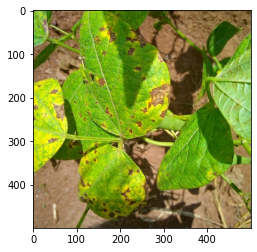

 Actual Label:angular_leaf_spot
Predicted Label:  angular_leaf_spot
------------------------


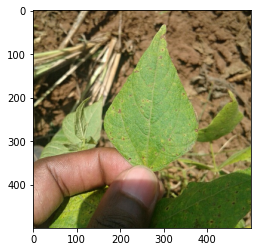

 Actual Label:bean_rust
Predicted Label:  bean_rust
------------------------


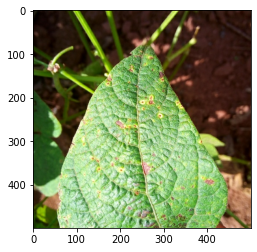

 Actual Label:bean_rust
Predicted Label:  angular_leaf_spot
------------------------


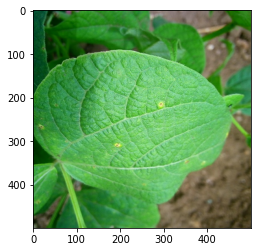

 Actual Label:bean_rust
Predicted Label:  healthy
------------------------


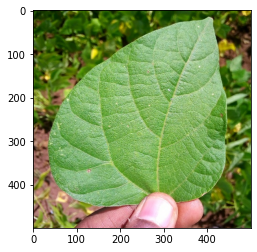

 Actual Label:healthy
Predicted Label:  healthy
------------------------


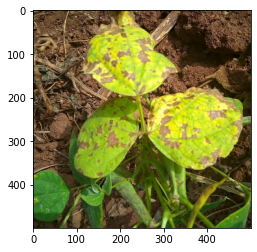

 Actual Label:angular_leaf_spot
Predicted Label:  angular_leaf_spot
------------------------


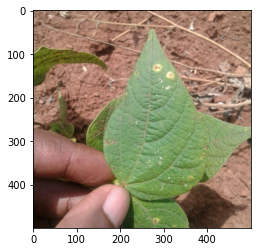

 Actual Label:bean_rust
Predicted Label:  bean_rust
------------------------


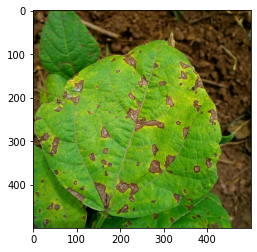

 Actual Label:angular_leaf_spot
Predicted Label:  angular_leaf_spot
------------------------


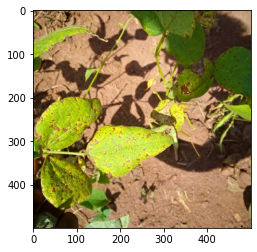

 Actual Label:angular_leaf_spot
Predicted Label:  angular_leaf_spot
------------------------


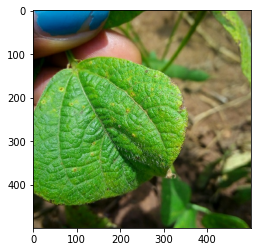

 Actual Label:bean_rust
Predicted Label:  bean_rust
------------------------


In [ ]:

for test_sample in datasets[1].take(10):
  image,label=test_sample[0],test_sample[1]

  image_scaled,label_arr=scale(test_sample[0],test_sample[1])
  image_scaled=np.expand_dims(image_scaled,axis=0)

  img=tf.keras.preprocessing.image.img_to_array(image)
  
  pred=model.predict(image_scaled)
  #print(pred)

  plt.figure()
  plt.imshow(image)
  plt.show()

  print(' Actual Label:%s'% info.features['label'].names[label.numpy()])
  print('Predicted Label:  %s' % info.features['label'].names[np.argmax(pred)])
  print('------------------------')



In [ ]:
new_model = tf.keras.models.load_model('/content/beans')
new_model.summary()

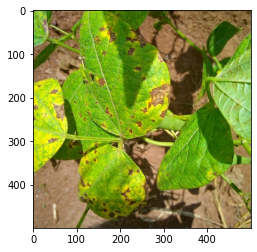

 Actual Label:angular_leaf_spot
Predicted Label:  angular_leaf_spot
------------------------


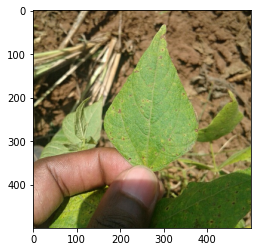

 Actual Label:bean_rust
Predicted Label:  bean_rust
------------------------


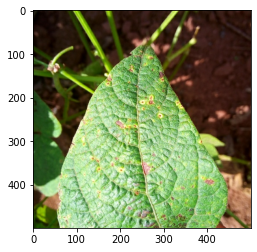

 Actual Label:bean_rust
Predicted Label:  angular_leaf_spot
------------------------


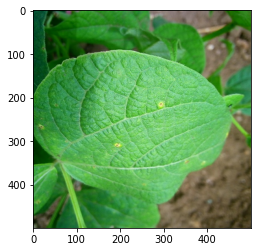

 Actual Label:bean_rust
Predicted Label:  healthy
------------------------


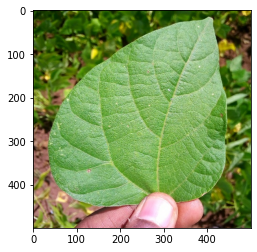

 Actual Label:healthy
Predicted Label:  healthy
------------------------


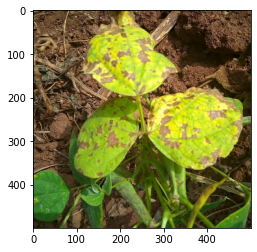

 Actual Label:angular_leaf_spot
Predicted Label:  angular_leaf_spot
------------------------


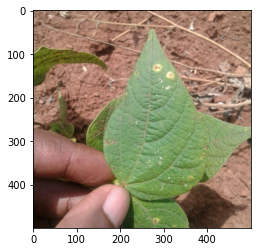

 Actual Label:bean_rust
Predicted Label:  bean_rust
------------------------


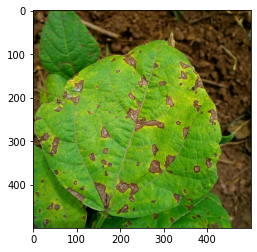

 Actual Label:angular_leaf_spot
Predicted Label:  angular_leaf_spot
------------------------


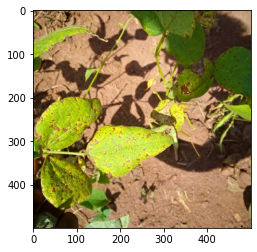

 Actual Label:angular_leaf_spot
Predicted Label:  angular_leaf_spot
------------------------


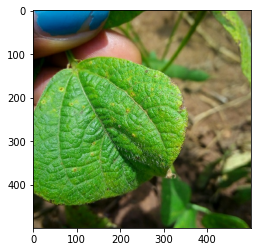

 Actual Label:bean_rust
Predicted Label:  bean_rust
------------------------


In [ ]:

for test_sample in datasets[1].take(10):
  image,label=test_sample[0],test_sample[1]

  image_scaled,label_arr=scale(test_sample[0],test_sample[1])
  image_scaled=np.expand_dims(image_scaled,axis=0)

  img=tf.keras.preprocessing.image.img_to_array(image)
  
  pred=new_model.predict(image_scaled)
  #print(pred)

  plt.figure()
  plt.imshow(image)
  plt.show()

  print(' Actual Label:%s'% info.features['label'].names[label.numpy()])
  print('Predicted Label:  %s' % info.features['label'].names[np.argmax(pred)])
  print('------------------------')



In [ ]:
for f0,f1 in datasets[1].map(scale).batch(200):
  y=np.argmax(f1,axis=1)
  y_pred=np.argmax(model.predict(f0),axis=1)
  print(tf.math.confusion_matrix(labels=y,predictions=y_pred,num_classes=3))

tf.Tensor(
[[40  3  0]
 [ 8 33  2]
 [ 0  4 38]], shape=(3, 3), dtype=int32)


In [ ]:
new_model = tf.keras.models.load_model('/content/beans')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 3843      
Total params: 2,261,827
Trainable params: 2,227,715
Non-trainable params: 34,112
_________________________________________________________________


# Deployment

In [ ]:
! ngrok authtoken 1gHMJGhD8fgZ0ou34eythzlCbkr_U7RRgMP4oQzgk91qPtdW


Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!pip install -U ipykernel
!pip install -q streamlit
!pip install pyngrok

Requirement already up-to-date: ipykernel in /usr/local/lib/python3.6/dist-packages (5.3.4)


In [ ]:
%%writefile score.py

import tensorflow as tf
import numpy as np
import streamlit as st
from PIL import Image
import requests
from io import BytesIO

st.set_option('deprecation.showfileUploaderEncoding', False)
st.title("Bean Image Classifier")
st.text("Provide URL of bean Image for image classification")

@st.cache(allow_output_mutation=True)
def load_model():
  new_model=tf.keras.models.load_model('/content/beans/')
  return new_model

with st.spinner('Loading Model Into Memory....'):
  new_model = load_model()

classes=['angular_leaf_spot','bean_rust','healthy']

def scale(image):
  image = tf.cast(image, tf.float32)
  image /= 255.0

  return tf.image.resize(image,[224,224])

def decode_img(image):
  img = tf.image.decode_jpeg(image, channels=3)
  img = scale(img)
  return np.expand_dims(img, axis=0)

path = st.text_input('Enter Image URL to Classify.. ','http://barmac.com.au/wp-content/uploads/sites/3/2016/01/Angular-Leaf-Spot-Beans1.jpg')
if path is not None:
    content = requests.get(path).content

    st.write("Predicted Class :")
    with st.spinner('classifying.....'):
      label =np.argmax(new_model.predict(decode_img(content)),axis=1)
      st.write(classes[label[0]])    
    st.write("")
    image = Image.open(BytesIO(content))
    st.image(image, caption='Classifying Bean Image', use_column_width=True)

Overwriting score.py


In [ ]:
!nohup streamlit run score.py &


nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
url = ngrok.connect(port=8501)
url

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 3843      
Total params: 2,261,827
Trainable params: 2,227,715
Non-trainable params: 34,112
_________________________________________________________________
